# **4. Machine Learning**

**Import Essential Libraries**

In [39]:
# libraries used for visualizations and cleaning of data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
sb.set()

# libraries used to train and evaluate different regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


### **4.1. Data Preprocessing**

**Data scaling** creates a fair playing field for all features in your dataset and allows your machine learning model to learn more effectively. Hence, both predictor and target variables were scaled.

In [64]:
#declare the predictor and target variables
X = df_final.drop(['price'], axis=1)
y = df_final['price']

#scaling the data
sc1=StandardScaler()
x_scaled = sc1.fit_transform(X)

sc2=StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(y.to_numpy().reshape(-1,1)))

#split scaled data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)

### **4.2. Building Machine Learning Models**

#### **4.2.1. Model 1: Linear Regression**
Linear regression draws a straight line finds through a cloud of points representing house features (house size, bedrooms etc.) and their selling prices. This line by minimizing the distance between the data points and the line itself. It also captures the overall trend, allowing us to estimate the price of a new house based on its features, assuming they fall within the range of houses used to build the model.

Goodness of Fit of Linear Regression Model 	Train Dataset
Explained Variance (R^2) 	: 0.7077886845100211
Mean Squared Error (MSE) 	: 0.2922137313839583

Goodness of Fit of Linear Regression Model 	Test Dataset
Explained Variance (R^2) 	: 0.6967428131572155
Mean Squared Error (MSE) 	: 0.3031452251450552



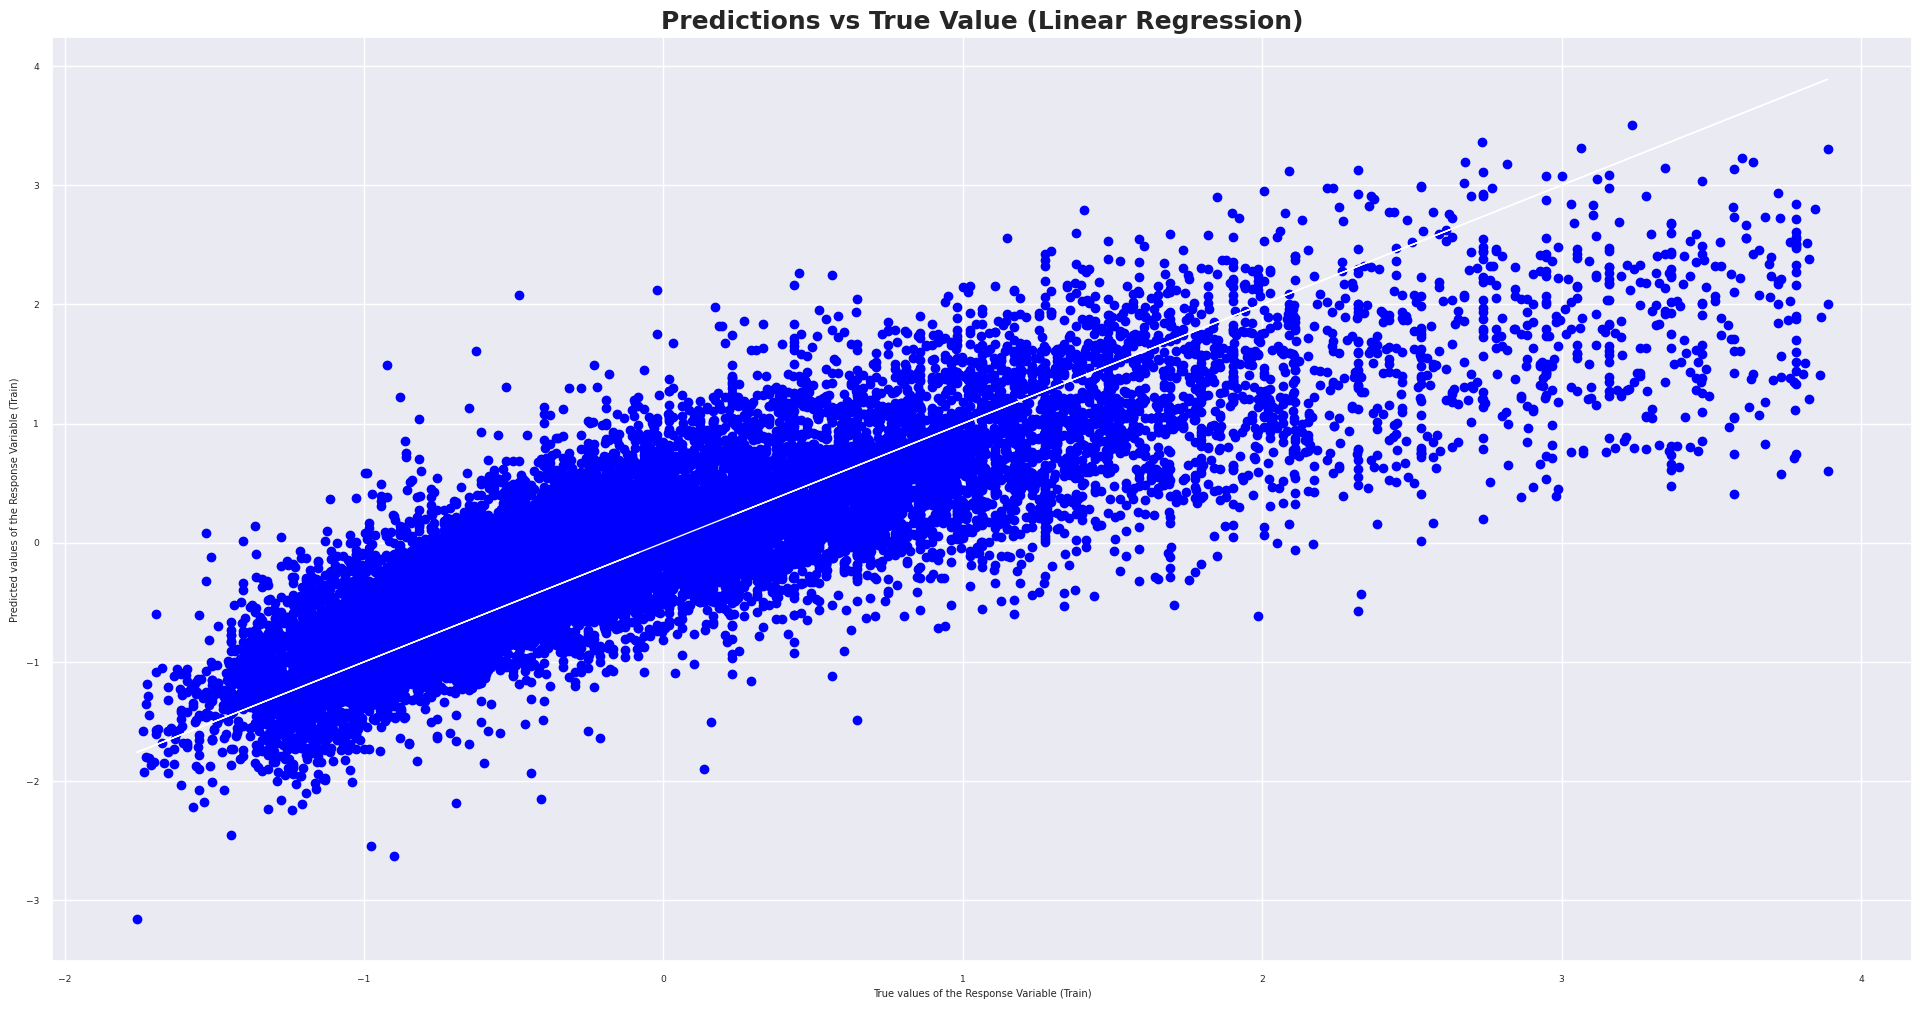

In [65]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_linreg_pred = linreg.predict(X_train)
y_test_linreg_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Linear Regression Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_linreg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Linear Regression Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_linreg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_linreg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (Linear Regression)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The Linear Regression model gives a **training accuracy** score of `0.708` and **testing accuracy** score of `0.698`.

#### **4.2.2. Model 2: Support Vector Regressor (SVR)**

Unlike the straight line, SVR creates a "margin of error" around an ideal fit line. This creates a "tube" encompassing most data points with a certain allowed distance for outliers. SVR focuses on the data points closest to this tube's edges (support vectors) that define the margin. This approach is useful for capturing some non-linear relationships and slight variations in pricing that linear regression might miss. It can still predict prices for houses that don't perfectly fit the straight line.



Goodness of Fit of SVR Model 	Train Dataset
Explained Variance (R^2) 	: 0.8484691686157934
Mean Squared Error (MSE) 	: 0.15153208418450498

Goodness of Fit of SVR Model 	Test Dataset
Explained Variance (R^2) 	: 0.8079822849560571
Mean Squared Error (MSE) 	: 0.19194682264533494



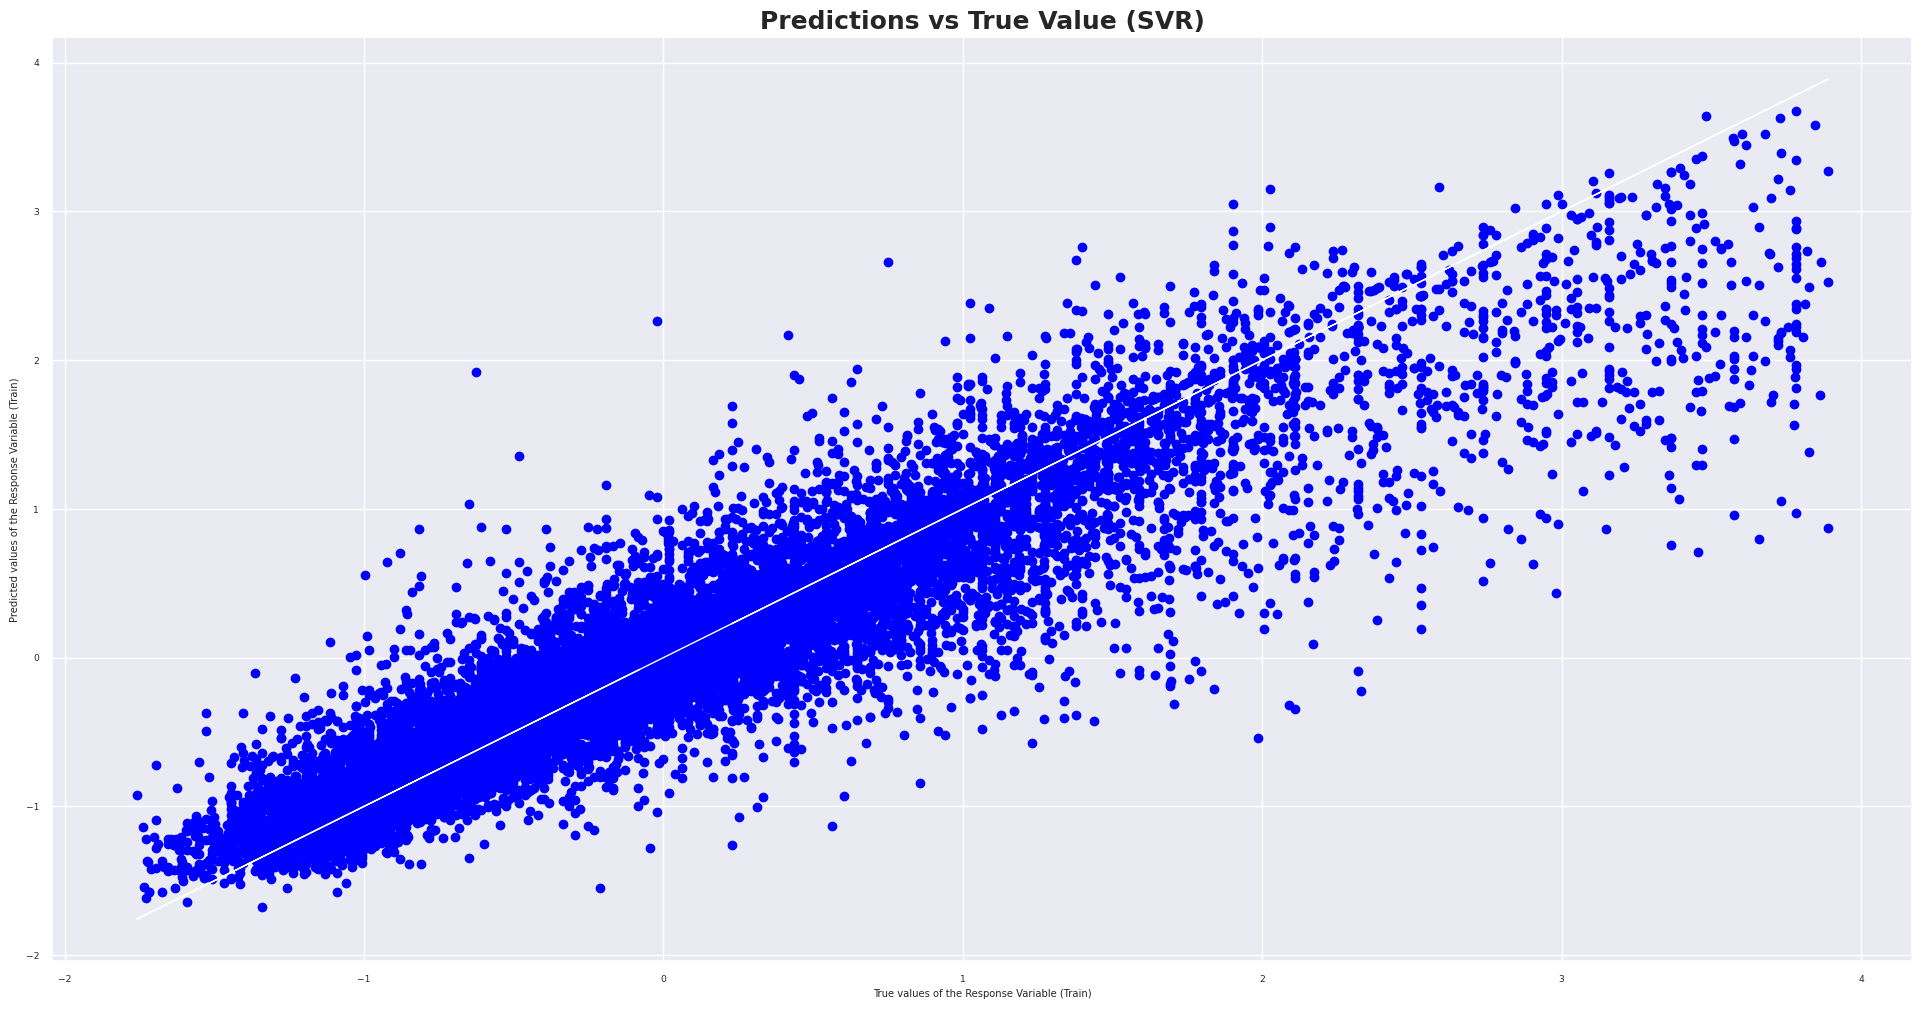

In [66]:
svrreg = SVR(kernel='rbf')
svrreg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_svrreg_pred = svrreg.predict(X_train)
y_test_svrreg_pred = svrreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of SVR Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", svrreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_svrreg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of SVR Model \tTest Dataset")
print("Explained Variance (R^2) \t:", svrreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_svrreg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_svrreg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (SVR)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The SVR model gives a **training accuracy** score of `0.848` and **testing accuracy** score of `0.808`.

#### **4.2.3. Model 3: Decision Tree Regressor**

 This model works like a series of yes-no questions to predict the house price. It starts by splitting the data based on a key feature (e.g. sqft_living > 2000 sqft).  At each split, it asks a question about another feature and further divides the data into more refined groups.  By following this decision tree, we can reach a final group (leaf) with a predicted average price range for houses with similar characteristics.

Goodness of Fit of Decision Tree Model 	Train Dataset
Explained Variance (R^2) 	: 0.9997985362471145
Mean Squared Error (MSE) 	: 0.00020146541851257825

Goodness of Fit of Decision Tree Model 	Test Dataset
Explained Variance (R^2) 	: 0.7189314136588982
Mean Squared Error (MSE) 	: 0.2809648166120717



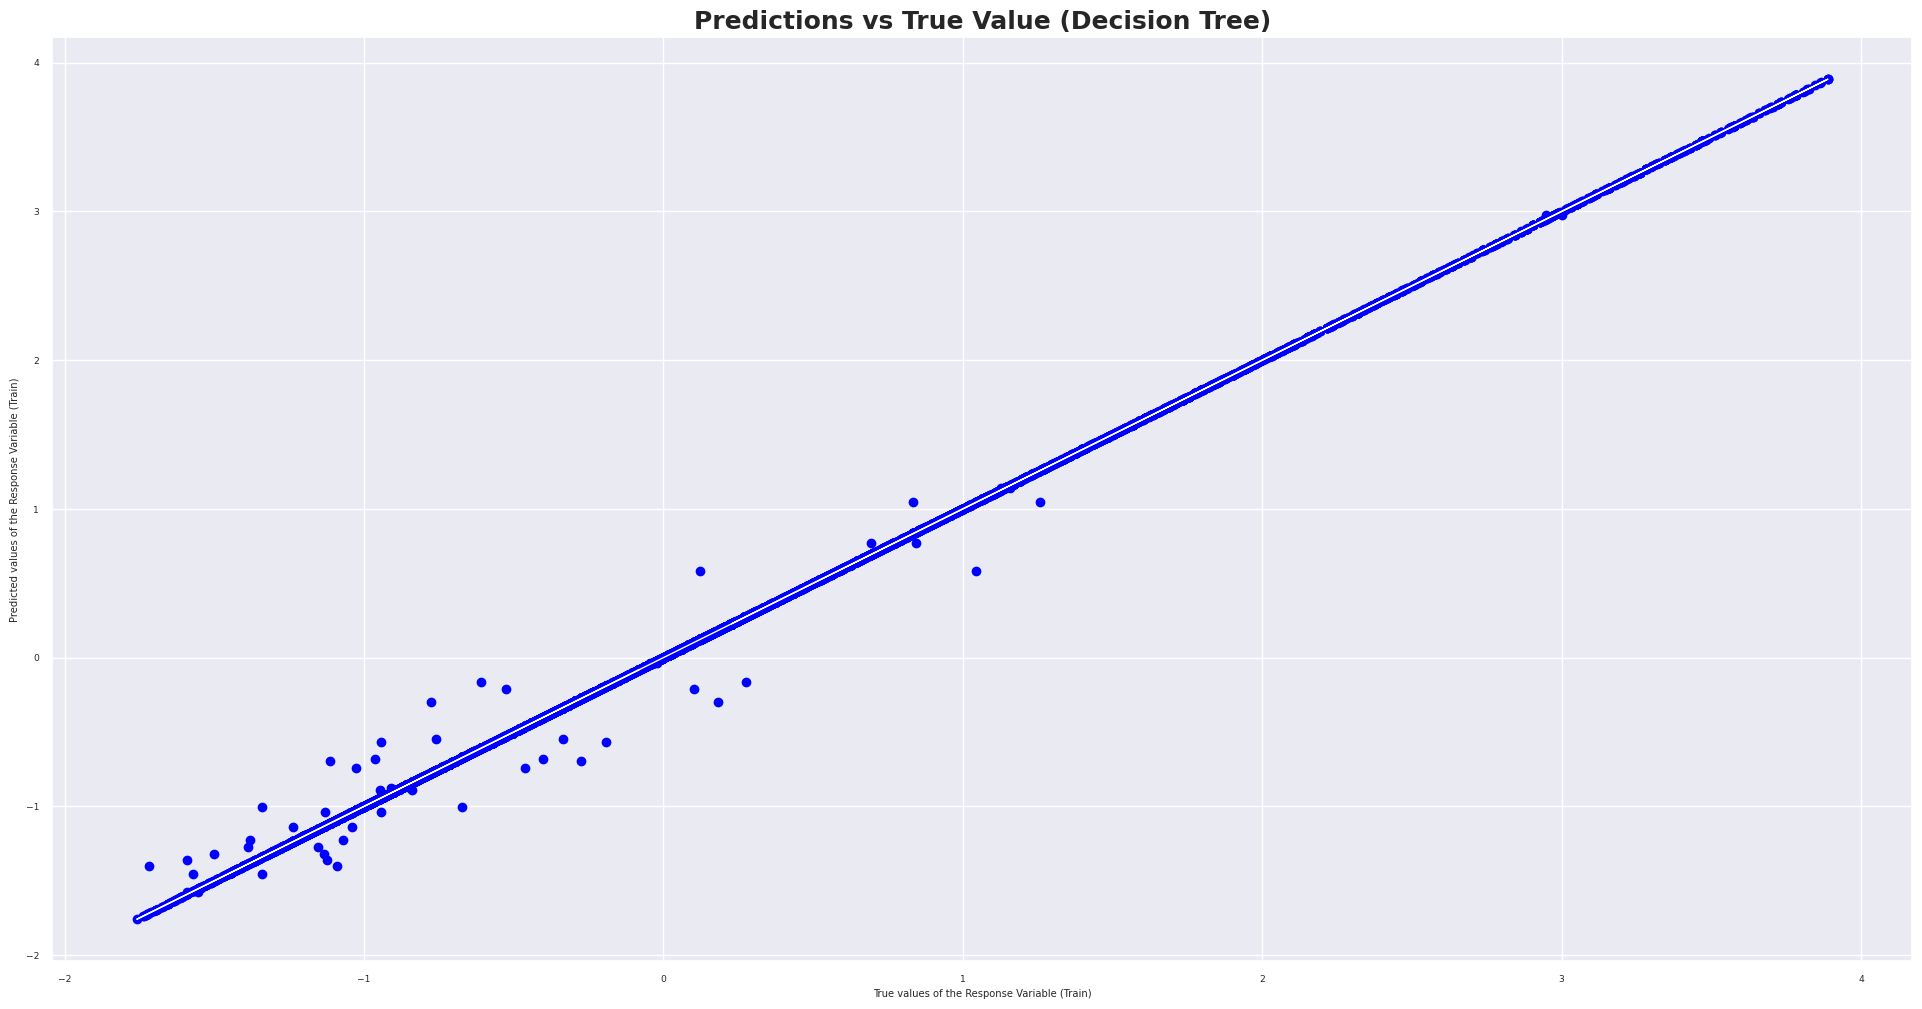

In [67]:
treereg = DecisionTreeRegressor(random_state=0)
treereg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_treereg_pred = treereg.predict(X_train)
y_test_treereg_pred = treereg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Decision Tree Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", treereg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_treereg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Decision Tree Model \tTest Dataset")
print("Explained Variance (R^2) \t:", treereg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_treereg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_treereg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (Decision Tree)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The Decision Tree Regressor model gives a **training accuracy** score of `0.999` and **testing accuracy** score of `0.719`. This model seems to be **too overfitted** as the training error is much lower than testing error.

#### **4.2.4. Model 4: Random Forest Regressor**

This model consists of a whole forest of decision trees, each trained on a slightly different subset of data and with random variations in the questions asked at each split. It combines the predictions of all these individual trees. By averaging the predictions from this "forest", it aims to improve accuracy and reduce the chance of overfitting to any specific trend in the data, leading to more robust predictions.

Goodness of Fit of Random Forest Model 	Train Dataset
Explained Variance (R^2) 	: 0.9724678052834194
Mean Squared Error (MSE) 	: 0.0275324223424799

Goodness of Fit of Random Forest Model 	Test Dataset
Explained Variance (R^2) 	: 0.8453251356226779
Mean Squared Error (MSE) 	: 0.15461775885381585



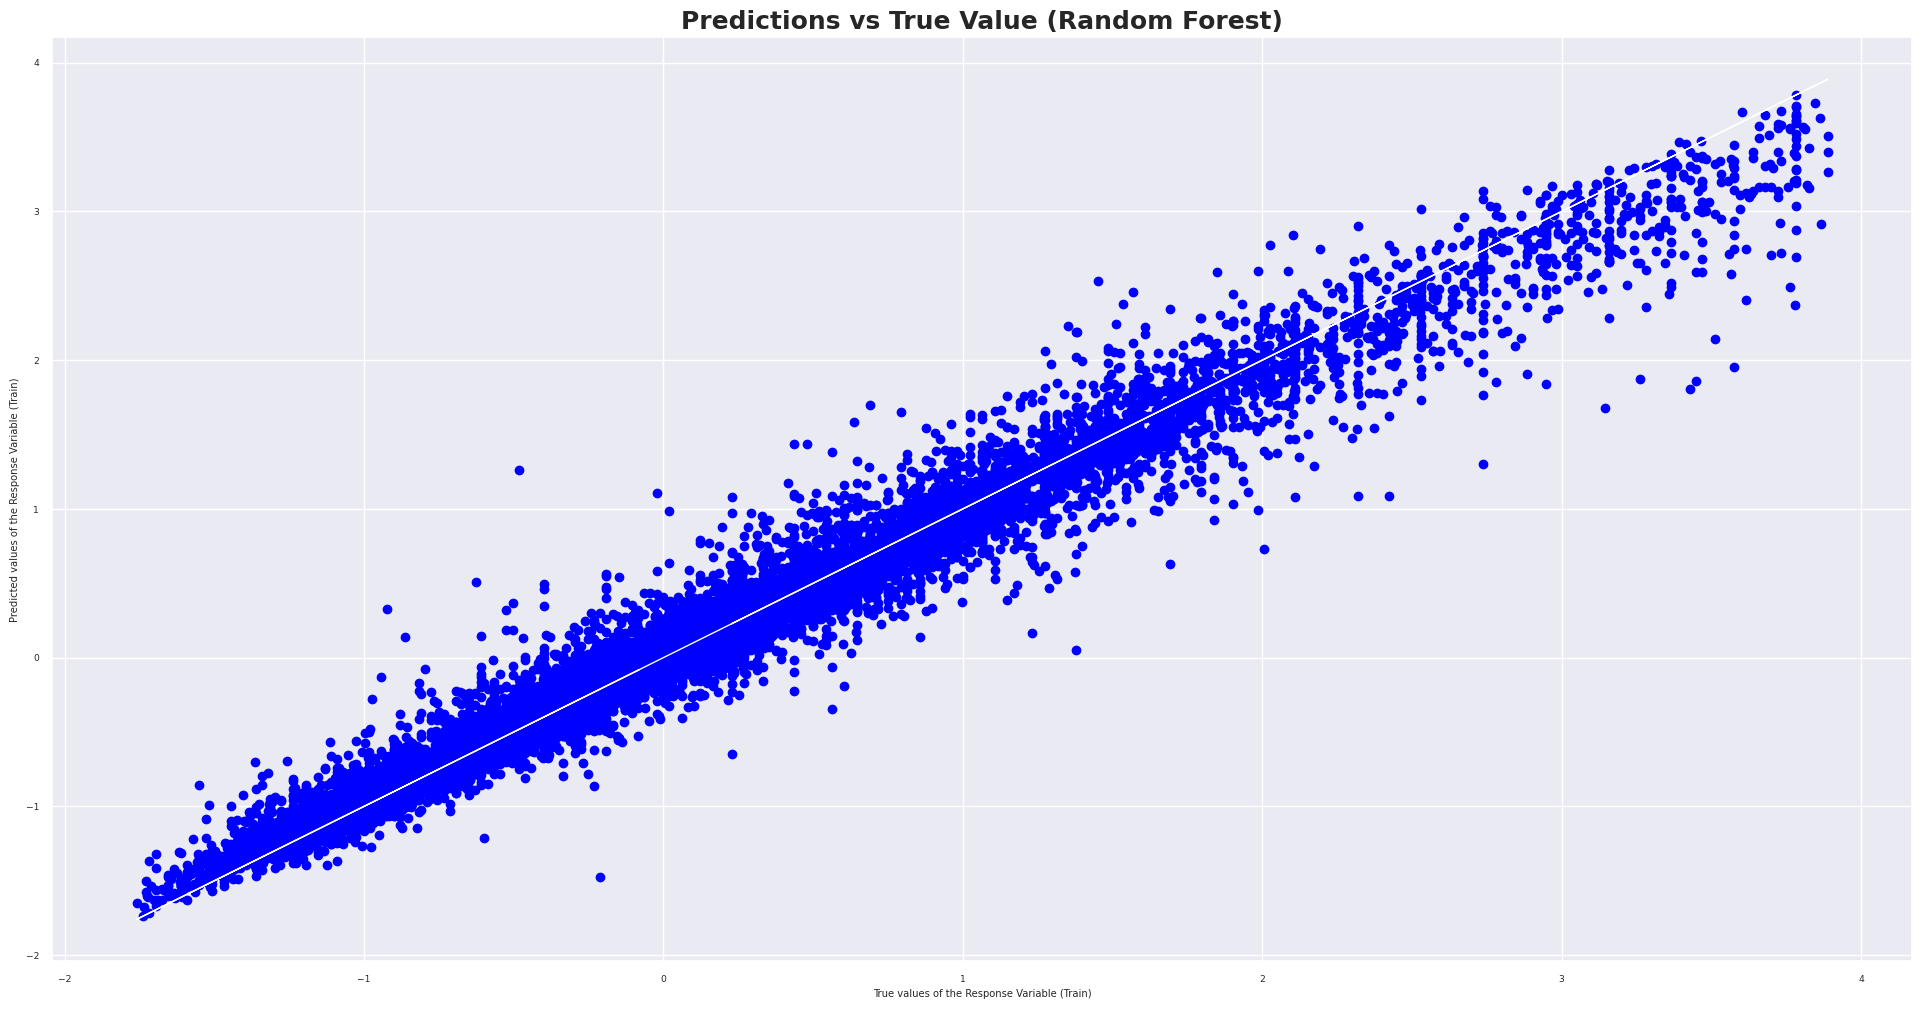

In [68]:
forestreg=RandomForestRegressor(n_estimators = 10,random_state=0)
forestreg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_forestreg_pred = forestreg.predict(X_train)
y_test_forestreg_pred = forestreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Random Forest Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forestreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_forestreg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Random Forest Model \tTest Dataset")
print("Explained Variance (R^2) \t:", forestreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_forestreg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_forestreg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (Random Forest)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The Random Forest Regressor model gives a **training accuracy** score of `0.972` and **testing accuracy** score of `0.845`.

### **4.3. Evaluation of Regression Models**

Various metrices were used to evaluate the performance of all four machine learning models. The metrices used are as follows:

* `R-squared (R²)`: Tells how well the regression line fits the data, with a value closer to 1 indicating a better fit.   
* `Mean Squared Error (MSE)`: Measures the average squared difference between predicted and actual house prices.   
* `Mean Absolute Percentage Error (MAPE)`: Expresses the average difference between predicted and actual prices as a percentage of the actual price, making it useful for interpreting errors relative to the house price scale.

In [69]:
#r2 score of all models
r2_linreg = linreg.score(X_test, y_test)
r2_svrreg = svrreg.score(X_test, y_test)
r2_treereg = treereg.score(X_test, y_test)
r2_forestreg = forestreg.score(X_test, y_test)

#mse of all models
mse_linreg = mean_squared_error(y_test, y_test_linreg_pred)
mse_svrreg = mean_squared_error(y_test, y_test_svrreg_pred)
mse_treereg = mean_squared_error(y_test, y_test_treereg_pred)
mse_forestreg = mean_squared_error(y_test, y_test_forestreg_pred)

#function to calc MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_linreg = round(mean_absolute_percentage_error(y_test, y_test_linreg_pred),4)
mape_svrreg = round(mean_absolute_percentage_error(y_test, y_test_svrreg_pred),4)
mape_treereg = round(mean_absolute_percentage_error(y_test, y_test_treereg_pred),4)
mape_forestreg = round(mean_absolute_percentage_error(y_test, y_test_forestreg_pred),4)

#print statistical summary
d = {'Accuracy (R² score)':[round(r2_linreg,4), round(r2_svrreg,4), round(r2_treereg,4), round(r2_forestreg,4)],
     'MSE':[round(mse_linreg,4), round(mse_svrreg,4), round(mse_treereg,4), round(mse_forestreg,4)],
     'MAPE':[mape_linreg, mape_svrreg, mape_treereg, mape_forestreg]}
stats_summary = pd.DataFrame(data=d, index=['Linear Regression', 'SVR', 'Decision Tree','Random Forest'])
stats_summary

,Accuracy (R² score),MSE,MAPE
Linear Regression,0.6967,0.3031,203.3716
SVR,0.8080,0.1919,149.7679
Decision Tree,0.7189,0.2810,243.3641
Random Forest,0.8453,0.1546,157.5226


From the statistical summary on the performances of all four models above, **SVR** and **Random Forest** seem to be the better models with higher accuracy score while having lower error scores for MSE and MAPE. Hence, further analysis will be done on these two models.

### **4.4. Checking for Overfitting (Best 2 Models)**

Checking for overfitting is crucial because it ensures our model performs well on unseen data. An overfit model memorizes the training data too closely, including noise and random variations. This makes it great at predicting the specific houses it saw during training but performs poorly when encountering new houses with slightly different features. Thus, this is an essential test to ensure the model performs just as well on unseen data.

In [70]:
# mse for training set
mse_svrreg_train = mean_squared_error(y_train, y_train_svrreg_pred)
mse_forestreg_train = mean_squared_error(y_train, y_train_forestreg_pred)

# creating dataframe for the compiled statistics
d = {'Training Error':[round(mse_svrreg_train,4), round(mse_forestreg_train,4)],
     'Testing Error':[round(mse_svrreg,4), round(mse_forestreg,4)]}

overfit_check = pd.DataFrame(data=d, index=['SVR', 'Random Forest'])
overfit_check

,Training Error,Testing Error
SVR,0.1515,0.1919
Random Forest,0.0275,0.1546


From the insights above, both models have lower training error then testing error which means they are not performing that great on unseen data. Thus, both seem to be slightly overfitted with Random Forest being slightly more than SVR.

### **4.5. Hyperparameter Tune Best Model**

**Hyperparameter tuning with validation** helps reduce overfitting by finding a model configuration that performs well on unseen data. The data is split into training and validation sets. The model is trained on the training data with different hyperparameter combinations. The performance of each configuration is evaluated on the validation set, which acts as a stand-in for unseen data. The hyperparameter combination that yields the best performance on the validation set is then chosen, as it's less likely to overfit to the specific details of the training data and likely generalizes better to new data.

In [71]:
# Split data into training, validation, and testing sets (common split: 80/10/10)
X_train, X_val_test, y_train, y_val_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']  # Added for overfitting control
}

# Create a RandomizedSearchCV object for Random Forest with validation set
rand_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, cv=3, scoring='r2', n_iter=10)
rand_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Random Forest Hyperparameters:", rand_search_rf.best_params_)

# Train the final Random Forest model with the best hyperparameters
best_model_rf = RandomForestRegressor(**rand_search_rf.best_params_)
best_model_rf.fit(X_train, y_train)

# Evaluate final Random Forest model on validation set
y_pred_val = best_model_rf.predict(X_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)

print("Random Forest Validation R^2:", val_r2)
print("Random Forest Validation MSE:", val_mse)

# Evaluate final Random Forest model on testing set (for reference)
y_pred_test = best_model_rf.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Random Forest Testing R^2:", test_r2)
print("Random Forest Testing MSE:", test_mse)


Best Random Forest Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}
Random Forest Validation R^2: 0.8507727698622572
Random Forest Validation MSE: 0.15209237961780145
Random Forest Testing R^2: 0.8676280784009862
Random Forest Testing MSE: 0.13410534487871575


Based on the above results, model has **high accuracy score** of `0.85` and `0.87` on validation and testing sets respectively. In addition, model also has low mean squared error of `0.15` and `0.13` on validation and testing sets respectively.

The close proximity between the validation and testing set metrics (R-squared and MSE) suggests that the model has generalised well avoiding significant overfitting. Thus, given the good performance on both validation and testing sets, the Random Forest Regressor model can be used to predict the house sale price in King County effectively.

---
# **5. Insights & Recommendations**

### **5.1. Most Important Feature To Predict House Sale Price**

In [72]:
#important feature with forest
X2=df_final.drop(['price'], axis=1)
X1=pd.DataFrame(X)
X1.columns=X2.columns
importance = best_model_rf.feature_importances_
importance = pd.DataFrame(importance)
importance = importance.nlargest(10, 0)
feature=importance.index
for i in range(0,10):
    print(f'Feature {i+1}: {X1.columns[feature[i]]}, Score: {importance[0].iloc[i]:.4f}')

Feature 1: grade, Score: 0.3406
Feature 2: lat, Score: 0.3008
Feature 3: sqft_living, Score: 0.1613
Feature 4: long, Score: 0.0509
Feature 5: sqft_living15, Score: 0.0304
Feature 6: building_age, Score: 0.0298
Feature 7: sqft_above, Score: 0.0168
Feature 8: sqft_lot, Score: 0.0168
Feature 9: view, Score: 0.0155
Feature 10: sqft_lot15, Score: 0.0153


The above list shows the **top 10 features** that played a significant role to predict the house sale price using our trained best model. The **location, house size, house architecture and building age** are some of the important factors to predicting house sale price.

### **5.2. The Expected House Sale Price Based On Requirements Given**

Now that we have our best trained model, prediction for house sale price in King County can be done. The specific requirements given by Lucas on the type of house he was looking for are as follows:

**GENERAL REQUIREMENTS**
>*`Number of bedrooms:`* at least 5   
*`Number of bathrooms:`* at least 4   
*`Number of floors:`* 2   
*`Need view?:`* do not matter   
*`Need waterfront?:`* do not matter   
*`House condition rate:`* 4 or 5   
*`House construction grade:`* at least 10   
*`Building age:`* 15-20 years old   
*`Years since renovated:`* max 5   





**LOCATION REQUIREMENTS**

Generally, hoping for the least priced option based on requirements above. Hence, preferably Southwest side of King County.

>*`Latitude:`* 47.25 to 47.4   
*`Longitude:`* -122.4 to -122.25


**HOUSE SIZE/MEASUREMENTS PREFERRED**


>*`Land space size (sqft_lot):`* at least average   
*`Living space size (sqft_living):`* above average   
*`Above ground floor size (sqft_above):`* at least average   
*`Basement size (sqft_basement):`* at least average   
*`Average land space of nearest 15 houses (sqft_lot15):`* at least average   
*`Average living space of nearest 15 houses (sqft_living15):`* above average   



In [73]:
# Reasonable price based on their requirements
med_sqft_lot = df_final['sqft_lot'].median()
med_sqft_above = df_final['sqft_above'].median()
med_sqft_basement = df_final['sqft_basement'].median()
med_sqft_lot15 = df_final['sqft_lot15'].median()
highavg_sqft_living = df_final['sqft_living'].quantile(0.75)
highavg_sqft_living15 = df_final['sqft_living15'].quantile(0.75)

data = {
    'bedrooms': [5],
    'bathrooms': [4],
    'sqft_living': [highavg_sqft_living],
    'sqft_lot': [med_sqft_lot],
    'floors': [2],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'grade': [10],
    'sqft_above': [med_sqft_above],
    'sqft_basement': [med_sqft_basement],
    'lat': [47.325],
    'long': [-122.325],
    'sqft_living15': [highavg_sqft_living15],
    'sqft_lot15': [med_sqft_lot15],
    'building_age': [20],
    'yrs_since_renov': [5]
}

# Create a DataFrame using the dictionary
df_test_min = pd.DataFrame(data)

# Display the DataFrame
df_test_min


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov
0,5,4,2470.0,7535.0,2,0,0,4,10,1530.0,0.0,47.325,-122.325,2310.0,7560.0,20,5


In [74]:
# Scale the test data
X_test_scaled = sc1.transform(df_test_min)

# Make predictions using the trained model
predictions = best_model_rf.predict(X_test_scaled)

# Inverse scale the predictions
unscaled_predictions = sc2.inverse_transform(predictions.reshape(-1, 1))

# Convert unscaled predictions to 1D array
unscaled_predictions = unscaled_predictions.ravel()

# Print actual predicted values
print(f'Expected House Sale Price: ${round(unscaled_predictions[0],2)}')


Expected House Sale Price: $373818.01


---
**EVALUATION SUMMARY**

Based on the analysis done, Lucas and his family could consider looking for houses in the **Southern part of King County** so as to find cheaper housing options. He could expect a housing price of **more or less around $373818.01** there. Based on the houses sold last year (May 2014 to May 2015), houses sold during **March to July** were generally cheaper. Hence, although this factor is not guaranteed to have any impact on house sale price, Lucas could take into consideration of this pattern noticed from last year's house purchases. Furthermore, Lucas should take note that the **location, house size and house architecture conditions** are some of the key factors that affect house sale price in King County. Thus, if he wants to explore more expensive or cheaper options, he should vary his preferences for these factors.
